In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('D:\Pgm\DataScience\Dataset\Email_spam\spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['spam']  =df['Category'].apply(lambda x:1 if x == 'spam' else 0)

In [5]:
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
X_train , X_test, y_train ,y_test = train_test_split(df.Message, df.spam,test_size=0.25)

In [9]:
X_train.describe()

count                       4179
unique                      3924
top       Sorry, I'll call later
freq                          22
Name: Message, dtype: object

In [10]:
cv = CountVectorizer()

In [11]:
X_train_count = cv.fit_transform(X_train.values)

In [13]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
model =MultinomialNB()

In [16]:
model.fit(X_train_count, y_train)

MultinomialNB()

In [49]:
email_ham = []

In [50]:
email_ham_count = cv.transform(email_ham)

In [51]:
model.predict(email_ham_count)

array([1], dtype=int64)

In [52]:
X_test_count = cv.transform(X_test)

In [53]:
model.score(X_test_count, y_test)

0.9870782483847811

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred = model.predict(X_test_count)

In [59]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1198,    1],
       [  17,  177]], dtype=int64)

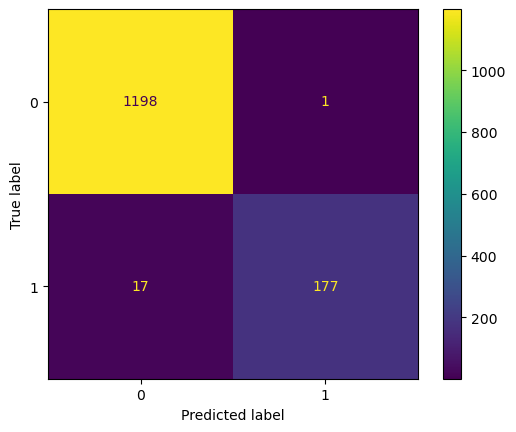

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

In [62]:
# TN :1198 were actually non spam and predicted also not spam
# FP : 1 were not spam but wrongly predicted as spam
# TP : 177 were actaully spam and predcited also spam
# FN : 17 were acutally spam but predicted as not spam

In [64]:
# so for spam model to be better FP has to be as low as possible

In [65]:
import pickle

In [66]:
with open('spam_classifier.pkl','wb') as f1:
    pickle.dump(model,f1)

In [67]:
with open('spam_vectorizer.pkl','wb') as f1:
    pickle.dump(cv,f1)